Epoch 0, Train Loss: 4.020185049324662, Val Loss: 2.631152493512635, Val Acc: 0.0
Epoch 10, Train Loss: 2.5830398897455558, Val Loss: 2.1908449135296864, Val Acc: 0.0
Epoch 20, Train Loss: 0.8515792052754865, Val Loss: 0.5949689999090888, Val Acc: 0.7699115044247787
Epoch 30, Train Loss: 0.11919329206506715, Val Loss: 0.09916766926683909, Val Acc: 0.9823008849557522
Epoch 40, Train Loss: 0.04703385611023523, Val Loss: 0.04137771751839956, Val Acc: 1.0
Epoch 50, Train Loss: 0.02876289494593109, Val Loss: 0.026008536197869924, Val Acc: 1.0


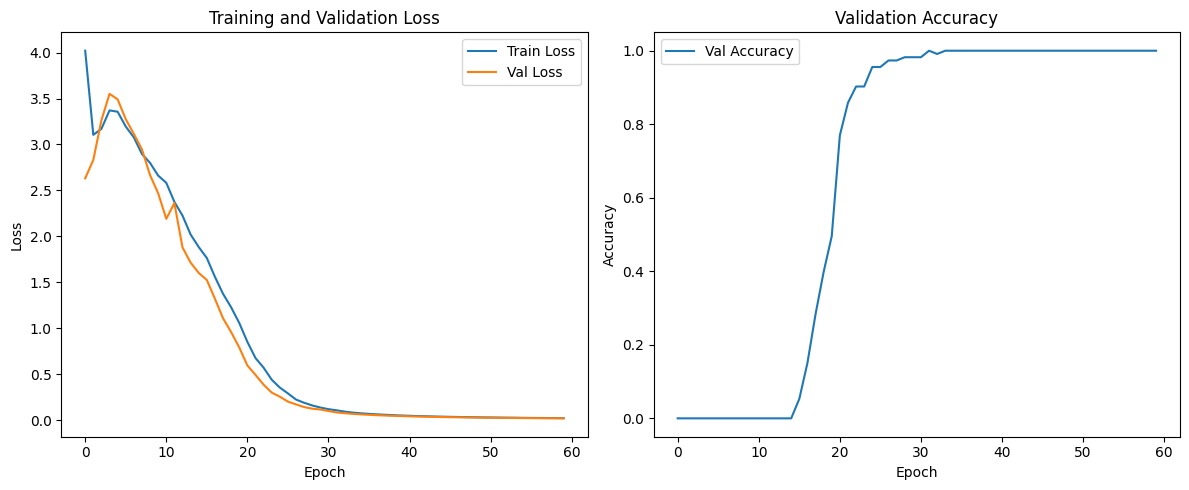


Qualitative Validation with Attention Visualization:
French: Elle parle français couramment -> English: She speaks French fluently


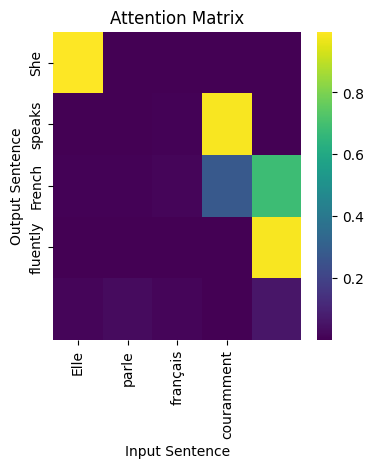

French: La soupe sent délicieusement bon -> English: The soup smells delicious


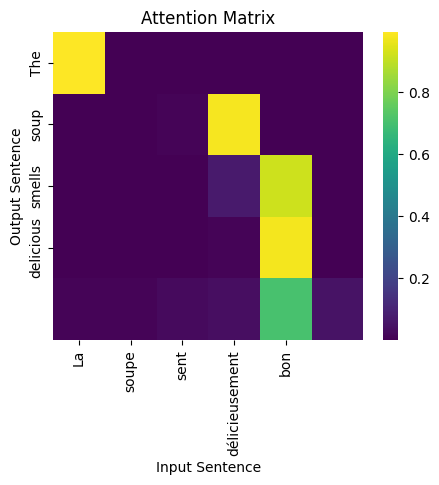

French: Nous sommes étudiants -> English: We are friends


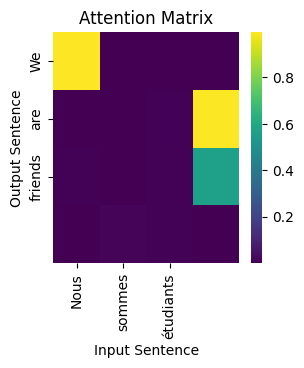

French: Il parle français -> English: He studies history


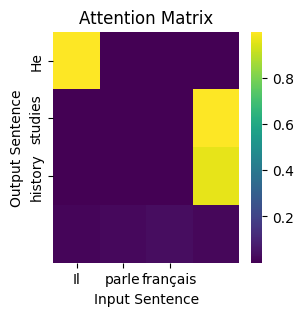

French: Ils jouent de la musique -> English: They love music at


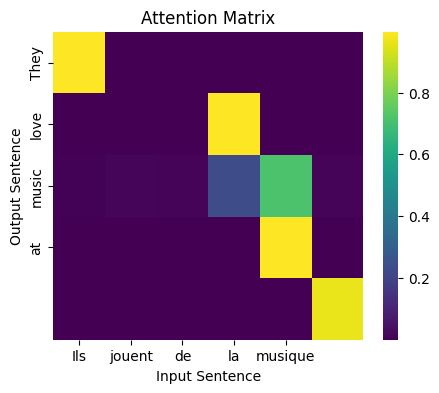

French: Le chat a faim -> English: The cat is hot


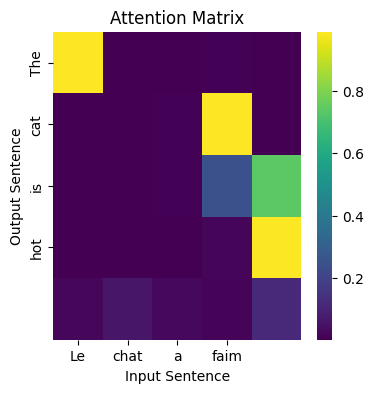

French: Le soleil se couche -> English: The sun is brightly


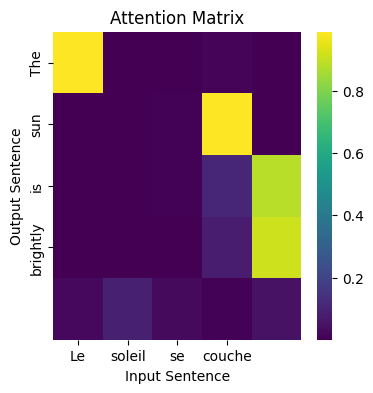

French: Nous aimons les livres -> English: We visit the museum


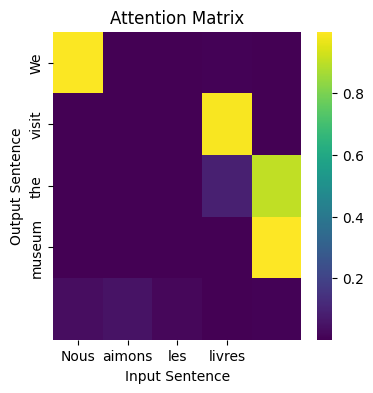

French: Il conduit une voiture -> English: He fixes a car


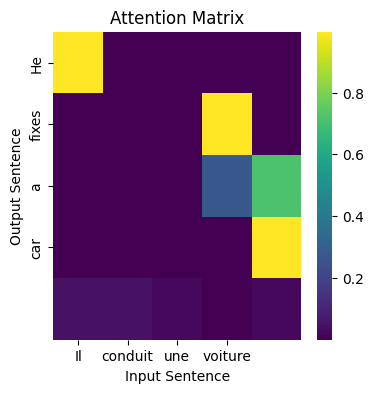

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset containing pairs of French and English sentences
french_to_english = [
    ("J'ai froid", "I am cold"),
    ("Tu es fatigué", "You are tired"),
    ("Il a faim", "He is hungry"),
    ("Elle est heureuse", "She is happy"),
    ("Nous sommes amis", "We are friends"),
    ("Ils sont étudiants", "They are students"),
    ("Le chat dort", "The cat is sleeping"),
    ("Le soleil brille", "The sun is shining"),
    ("Nous aimons la musique", "We love music"),
    ("Elle parle français couramment", "She speaks French fluently"),
    ("Il aime lire des livres", "He enjoys reading books"),
    ("Ils jouent au football chaque week-end", "They play soccer every weekend"),
    ("Le film commence à 19 heures", "The movie starts at 7 PM"),
    ("Elle porte une robe rouge", "She wears a red dress"),
    ("Nous cuisinons le dîner ensemble", "We cook dinner together"),
    ("Il conduit une voiture bleue", "He drives a blue car"),
    ("Ils visitent souvent des musées", "They visit museums often"),
    ("Le restaurant sert une délicieuse cuisine", "The restaurant serves delicious food"),
    ("Elle étudie les mathématiques à l'université", "She studies mathematics at university"),
    ("Nous regardons des films le vendredi", "We watch movies on Fridays"),
    ("Il écoute de la musique en faisant du jogging", "He listens to music while jogging"),
    ("Ils voyagent autour du monde", "They travel around the world"),
    ("Le livre est sur la table", "The book is on the table"),
    ("Elle danse avec grâce", "She dances gracefully"),
    ("Nous célébrons les anniversaires avec un gâteau", "We celebrate birthdays with cake"),
    ("Il travaille dur tous les jours", "He works hard every day"),
    ("Ils parlent différentes langues", "They speak different languages"),
    ("Les fleurs fleurissent au printemps", "The flowers bloom in spring"),
    ("Elle écrit de la poésie pendant son temps libre", "She writes poetry in her free time"),
    ("Nous apprenons quelque chose de nouveau chaque jour", "We learn something new every day"),
    ("Le chien aboie bruyamment", "The dog barks loudly"),
    ("Il chante magnifiquement", "He sings beautifully"),
    ("Ils nagent dans la piscine", "They swim in the pool"),
    ("Les oiseaux gazouillent le matin", "The birds chirp in the morning"),
    ("Elle enseigne l'anglais à l'école", "She teaches English at school"),
    ("Nous prenons le petit déjeuner ensemble", "We eat breakfast together"),
    ("Il peint des paysages", "He paints landscapes"),
    ("Ils rient de la blague", "They laugh at the joke"),
    ("L'horloge tic-tac bruyamment", "The clock ticks loudly"),
    ("Elle court dans le parc", "She runs in the park"),
    ("Nous voyageons en train", "We travel by train"),
    ("Il écrit une lettre", "He writes a letter"),
    ("Ils lisent des livres à la bibliothèque", "They read books at the library"),
    ("Le bébé pleure", "The baby cries"),
    ("Elle étudie dur pour les examens", "She studies hard for exams"),
    ("Nous plantons des fleurs dans le jardin", "We plant flowers in the garden"),
    ("Il répare la voiture", "He fixes the car"),
    ("Ils boivent du café le matin", "They drink coffee in the morning"),
    ("Le soleil se couche le soir", "The sun sets in the evening"),
    ("Elle danse à la fête", "She dances at the party"),
    ("Nous jouons de la musique au concert", "We play music at the concert"),
    ("Il cuisine le dîner pour sa famille", "He cooks dinner for his family"),
    ("Ils étudient la grammaire française", "They study French grammar"),
    ("La pluie tombe doucement", "The rain falls gently"),
    ("Elle chante une chanson", "She sings a song"),
    ("Nous regardons un film ensemble", "We watch a movie together"),
    ("Il dort profondément", "He sleeps deeply"),
    ("Ils voyagent à Paris", "They travel to Paris"),
    ("Les enfants jouent dans le parc", "The children play in the park"),
    ("Elle se promène le long de la plage", "She walks along the beach"),
    ("Nous parlons au téléphone", "We talk on the phone"),
    ("Il attend le bus", "He waits for the bus"),
    ("Ils visitent la tour Eiffel", "They visit the Eiffel Tower"),
    ("Les étoiles scintillent la nuit", "The stars twinkle at night"),
    ("Elle rêve de voler", "She dreams of flying"),
    ("Nous travaillons au bureau", "We work in the office"),
    ("Il étudie l'histoire", "He studies history"),
    ("Ils écoutent la radio", "They listen to the radio"),
    ("Le vent souffle doucement", "The wind blows gently"),
    ("Elle nage dans l'océan", "She swims in the ocean"),
    ("Nous dansons au mariage", "We dance at the wedding"),
    ("Il gravit la montagne", "He climbs the mountain"),
    ("Ils font de la randonnée dans la forêt", "They hike in the forest"),
    ("Le chat miaule bruyamment", "The cat meows loudly"),
    ("Elle peint un tableau", "She paints a picture"),
    ("Nous construisons un château de sable", "We build a sandcastle"),
    ("Il chante dans le chœur", "He sings in the choir"),
    ("Ils font du vélo", "They ride bicycles"),
    ("Le café est chaud", "The coffee is hot"),
    ("Elle porte des lunettes", "She wears glasses"),
    ("Nous rendons visite à nos grands-parents", "We visit our grandparents"),
    ("Il joue de la guitare", "He plays the guitar"),
    ("Ils font du shopping", "They go shopping"),
    ("Le professeur explique la leçon", "The teacher explains the lesson"),
    ("Elle prend le train pour aller au travail", "She takes the train to work"),
    ("Nous faisons des biscuits", "We bake cookies"),
    ("Il se lave les mains", "He washes his hands"),
    ("Ils apprécient le coucher du soleil", "They enjoy the sunset"),
    ("La rivière coule calmement", "The river flows calmly"),
    ("Elle nourrit le chat", "She feeds the cat"),
    ("Nous visitons le musée", "We visit the museum"),
    ("Il répare son vélo", "He fixes his bicycle"),
    ("Ils peignent les murs", "They paint the walls"),
    ("Le bébé dort paisiblement", "The baby sleeps peacefully"),
    ("Elle attache ses lacets", "She ties her shoelaces"),
    ("Nous montons les escaliers", "We climb the stairs"),
    ("Il se rase le matin", "He shaves in the morning"),
    ("Ils mettent la table", "They set the table"),
    ("L'avion décolle", "The airplane takes off"),
    ("Elle arrose les plantes", "She waters the plants"),
    ("Nous pratiquons le yoga", "We practice yoga"),
    ("Il éteint la lumière", "He turns off the light"),
    ("Ils jouent aux jeux vidéo", "They play video games"),
    ("La soupe sent délicieusement bon", "The soup smells delicious"),
    ("Elle ferme la porte à clé", "She locks the door"),
    ("Nous profitons d'un pique-nique", "We enjoy a picnic"),
    ("Il vérifie ses emails", "He checks his email"),
    ("Ils vont à la salle de sport", "They go to the gym"),
    ("La lune brille intensément", "The moon shines brightly"),
    ("Elle attrape le bus", "She catches the bus"),
    ("Nous saluons nos voisins", "We greet our neighbors"),
    ("Il se peigne les cheveux", "He combs his hair"),
    ("Ils font un signe d'adieu", "They wave goodbye")
]

# Special tokens for the start and end of sequences
SOS_token = 0  # Start Of Sequence Token
EOS_token = 1  # End Of Sequence Token

# Preparing the word to index mapping and vice versa
word_to_index = {"SOS": SOS_token, "EOS": EOS_token}
index_to_word = {SOS_token: "SOS", EOS_token: "EOS"}

# Build vocabulary
for fr, eng in french_to_english:
    for word in fr.split():
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)
            index_to_word[len(word_to_index) - 1] = word
    for word in eng.split():
        if word not in word_to_index:
            word_to_index[word] = len(word_to_index)
            index_to_word[len(word_to_index) - 1] = word

class TranslationDataset(Dataset):
    """Custom Dataset class for handling translation pairs."""
    def __init__(self, dataset, word_to_index):
        self.dataset = dataset
        self.word_to_index = word_to_index

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        input_sentence, target_sentence = self.dataset[idx]
        input_tensor = torch.tensor([self.word_to_index[word] for word in input_sentence.split()] + [EOS_token], dtype=torch.long)
        target_tensor = torch.tensor([self.word_to_index[word] for word in target_sentence.split()] + [EOS_token], dtype=torch.long)
        return input_tensor, target_tensor

# Creating a DataLoader to batch and shuffle the dataset
translation_dataset = TranslationDataset(french_to_english, word_to_index)
dataloader = DataLoader(translation_dataset, batch_size=1, shuffle=True)

# Setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Encoder(nn.Module):
    """The Encoder part of the seq2seq model."""
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

class AttnDecoder(nn.Module):
    """Decoder with attention mechanism."""
    def __init__(self, hidden_size, output_size, max_length=10, dropout_p=0.1):
        super(AttnDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        # Calculate attention weights
        attn_weights = torch.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        # Apply attention weights to encoder outputs to get context
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = torch.relu(output)
        output, hidden = self.gru(output, hidden)

        output = torch.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# Assuming all words in the dataset + 'SOS' and 'EOS' tokens are included in word_to_index
input_size = len(word_to_index)
hidden_size = 256
output_size = len(word_to_index)

encoder = Encoder(input_size=input_size, hidden_size=hidden_size).to(device)
decoder = AttnDecoder(hidden_size=hidden_size, output_size=output_size).to(device)

# Set the learning rate for optimization
learning_rate = 0.01

# Initializing optimizers for both encoder and decoder with Stochastic Gradient Descent (SGD)
encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)

# Negative Log Likelihood Loss function for calculating loss
criterion = nn.NLLLoss()

# Define the train function
def train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=10):
    encoder_hidden = encoder.initHidden()

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    input_length = input_tensor.size(0)
    target_length = target_tensor.size(0)

    encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

    loss = 0

    for ei in range(input_length):
        encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
        encoder_outputs[ei] = encoder_output[0, 0]

    decoder_input = torch.tensor([[SOS_token]], device=device)
    decoder_hidden = encoder_hidden

    for di in range(target_length):
        decoder_output, decoder_hidden, decoder_attention = decoder(
            decoder_input, decoder_hidden, encoder_outputs)
        topv, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze().detach()

        loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
        if decoder_input.item() == EOS_token:
            break

    loss.backward()

    encoder_optimizer.step()
    decoder_optimizer.step()

    return loss.item() / target_length

# Set number of epochs for training
n_epochs = 60


train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

def calculate_accuracy(predicted_indices, target_tensor):
    return int(predicted_indices == target_tensor.tolist())

def evaluate(encoder, decoder, dataloader, criterion, max_length=10):
    encoder.eval()
    decoder.eval()

    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():
        for input_tensor, target_tensor in dataloader:
            input_tensor = input_tensor[0].to(device)
            target_tensor = target_tensor[0].to(device)

            encoder_hidden = encoder.initHidden()

            input_length = input_tensor.size(0)
            target_length = target_tensor.size(0)

            encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

            loss = 0

            for ei in range(input_length):
                encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
                encoder_outputs[ei] = encoder_output[0, 0]

            decoder_input = torch.tensor([[SOS_token]], device=device)
            decoder_hidden = encoder_hidden

            predicted_indices = []

            for di in range(target_length):
                decoder_output, decoder_hidden, decoder_attention = decoder(
                    decoder_input, decoder_hidden, encoder_outputs)
                topv, topi = decoder_output.topk(1)
                predicted_indices.append(topi.item())
                decoder_input = topi.squeeze().detach()

                loss += criterion(decoder_output, target_tensor[di].unsqueeze(0))
                if decoder_input.item() == EOS_token:
                    break

            total_loss += loss.item() / target_length
            correct_predictions += calculate_accuracy(predicted_indices, target_tensor)

        average_loss = total_loss / len(dataloader)
        accuracy = correct_predictions / len(dataloader)

    return average_loss, accuracy

# Training loop
for epoch in range(n_epochs):
    encoder.train()
    decoder.train()

    total_train_loss = 0
    total_train_correct = 0

    for input_tensor, target_tensor in dataloader:
        input_tensor = input_tensor[0].to(device)
        target_tensor = target_tensor[0].to(device)

        loss = train(input_tensor, target_tensor, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion)
        total_train_loss += loss

    avg_train_loss = total_train_loss / len(dataloader)
    avg_train_accuracy = total_train_correct / len(dataloader)

    # validation with the same dataset
    avg_val_loss, avg_val_accuracy = evaluate(encoder, decoder, dataloader, criterion)

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}, Val Acc: {avg_val_accuracy}')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Function to generate translations with attention
def generate_translation_with_attention(encoder, decoder, sentence, word_to_index, index_to_word, max_length=10):
    with torch.no_grad():
        input_tensor = torch.tensor([word_to_index[word] for word in sentence.split()] + [EOS_token], dtype=torch.long, device=device)
        input_length = input_tensor.size(0)

        encoder_hidden = encoder.initHidden()

        # Store encoder outputs
        encoder_outputs = torch.zeros(max_length, encoder.hidden_size, device=device)

        for ei in range(input_length):
            encoder_output, encoder_hidden = encoder(input_tensor[ei].unsqueeze(0), encoder_hidden)
            encoder_outputs[ei] = encoder_output[0, 0]

        decoder_input = torch.tensor([[SOS_token]], device=device)
        decoder_hidden = encoder_hidden

        decoded_words = []
        attentions = torch.zeros(max_length, max_length)

        for di in range(max_length):
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs)
            attentions[di] = decoder_attention.data
            topv, topi = decoder_output.topk(1)
            if topi.item() == EOS_token:
                break
            else:
                decoded_words.append(index_to_word[topi.item()])

            decoder_input = topi.squeeze().detach()

        return ' '.join(decoded_words), attentions[:di+1, :input_length]

# Function to plot attention matrix
def plot_attention(attention, input_sentence, output_sentence):
    fig, ax = plt.subplots(figsize=(len(input_sentence.split()), len(output_sentence.split())))
    sns.heatmap(attention, cmap='viridis', ax=ax, xticklabels=input_sentence.split(), yticklabels=output_sentence.split())
    plt.xlabel('Input Sentence')
    plt.ylabel('Output Sentence')
    plt.title('Attention Matrix')
    plt.show()

# Validation sentences
validation_sentences = [
    "Elle parle français couramment",
    "La soupe sent délicieusement bon",
    "Nous sommes étudiants",
    "Il parle français",
    "Ils jouent de la musique",
    "Le chat a faim",
    "Le soleil se couche",
    "Nous aimons les livres",
    "Il conduit une voiture"
]

# print translations for validation sentences with attention visualization
print("\nQualitative Validation with Attention Visualization:")
for sentence in validation_sentences:
    translation, attention = generate_translation_with_attention(encoder, decoder, sentence, word_to_index, index_to_word)
    print(f"French: {sentence} -> English: {translation}")
    plot_attention(attention.cpu().numpy(), sentence, translation)

